# Logistic Regression - Binary Classification

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# set figure style
plt.style.use('seaborn-whitegrid')
# random seed for reproducibility
np.random.seed(101)

## Logistic regression
In statistics, the `logistic model` (or logit model) is used to model the probability of a certain class or event existing such as *pass/fail*, *win/lose*, *alive/dead* or *healthy/sick*. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.

The basic idea of logictic regression is to model the probability of certain entity belonging to one of the 2 or more classes or categories. 

Logistic regression is named for the function used at the core of the method, the `logistic function`. The `logistic function`, also called the **sigmoid function** was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

The sigmoid function is defined as, 

$$
\sigma(x) = \frac {1} {1 + e^{-x}}
$$

<img src="./imgs/sigmoid.png" width = "512" height = "512" />

Except for this logistic function, `Logistic Regression` is essentially same as Linear Regression. We have some predictor variables, from which we want to make predictions, and we have an outcome variable, which represent the class/category of the instance of predictor variables.

The only difference here is that after multiplying the model weights with predictor variables, we apply sigmoid on the output to get a probability value, which we use to make the prediction about the category of the instance. This is represented as, 

$$
a(X) = W^T . X
$$
where,
- $a(X)$ : logits for example X
- $W$ : Weight matrix
- $X$ : predictor variables

Now, we pass these logits through the sigmoid function, which activates the output to produce probability.

$$
\hat{y} = \sigma( a(X) )
$$

Once, we get the activated result, we threshold the result as follows,

$$
\hat{y} = \left\{\begin{array}{l}1, \quad if \quad \hat{y} \ge 0.5\\0 \quad otherwise\end{array}\right.
$$

## Simple Example
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. 

For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classiﬁcation model that estimates an applicant’s probability of admission based the scores from those two exam

**Note**: The dataset is taken from `Stanford machine Learning Course`, link in references.

Let's first load the data and plot it to see how it looks

### Visualizing Data

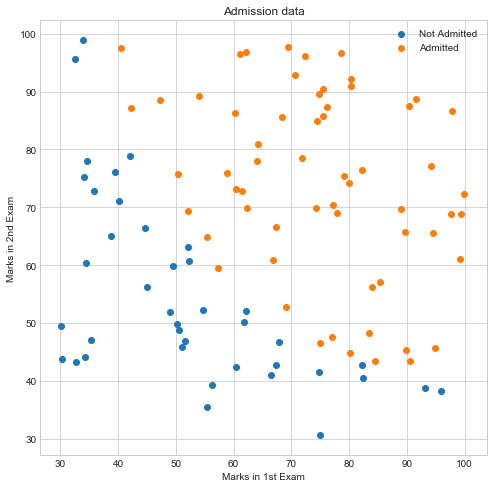

In [2]:
# Load data
data = np.genfromtxt("AdmissionData.txt", delimiter=",")

# seperate examples of each class in different variables
cls_0 = data[np.where(data[:, 2] == 0)]
cls_1 = data[np.where(data[:, 2] == 1)]

# Plotting data
fig = plt.figure(figsize=(8, 8))
plt.scatter(cls_0[:, 0], cls_0[:, 1], label = "Not Admitted")
plt.scatter(cls_1[:, 0], cls_1[:, 1], label = "Admitted")
plt.title("Admission data")
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

### Loading Data
Let's load our data in variables `X` and `y` and also initialize the model parameters `theta`.

In [3]:
x_values = data[:, :-1]
X = np.ones((x_values.shape[0], x_values.shape[1] + 1))
X[:, 1:] = x_values

y_values = data[:, -1]
y = y_values.reshape(-1, 1)

theta = np.random.rand(X.shape[1], 1)

Now, let's code our sigmoid function, along with functions to calculate logits and probabilities.

**Note**: We are going to use an advance optimization technique, preimplemented in `scipy` library. For that we write all the functions in such a way that our model parametrs are the first argument to the functions.

In [4]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate Logits
def logits(weights, x):
    return np.dot(x, weights)

# Calculate probabilities
def probability(weights, x):
    return sigmoid(logits(weights, x))

### Cost function
In Machine Learning, cost functions are used to estimate how badly models are performing.Put simply, a cost function is a measure of how wrong the model is in terms of its ability to estimate the relationship between X and y.

The cost function in `Logistic Regression` is different from the one in `Linear Regression`, as now the output of our model is not continous, it is discrete. So we need a loss function that can account for these discrete values.

#### Cross Entropy Loss
Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label.

In binary classification, the cross entropy loss is defined as,

$$
Cost(\hat{y}, y) = \left\{\begin{array}{l}-log(\hat{y}) \quad \quad \quad if \quad y = 1\\-log(1 - \hat{y}) \quad \quad if \quad y = 0\end{array}\right.
$$

We can combine this two part equation to form our final cost function as follows,

$$
J = - \frac {1} {m} \{ \sum_{i = 1}^{m} y.log(\hat{y}) + (1 - y).log(1 - \hat{y}) \}
$$

where,
- $J$ : Cost function
- $m$ : number of instances
- $y$ : Ground truth
- $\hat{y}$ : predicted class

Let's code the above equation.

In [5]:
def cost_function(weights, x, y, epsilon = 1e-12):
    m = x.shape[0]
    y_hat = probability(weights, x)
    cost = -y * np.log(y_hat + epsilon) - (1 - y) * np.log(1 - y_hat + epsilon)
    cost = (1 / m) * np.sum(cost)
    return cost

cost_function(theta, X, y)

10.266839755073084

Now, we have our cost function. We need to find the gradients in order to update our model parameters so that it can learn. The cost function may look daunting at first when starting to differentiate but is very easy, once you know the differential of sigmoid function which is as follows, 

$$
\sigma(x) = \frac {1} {1 + e^{-x}}
$$

Differetial, 
$$
\sigma'(x) = \sigma(x).(1 - \sigma(x))
$$

To save space I am just writing the Gradient function and showing the complete proof of how I got it. You are welcome to try and differentiate on your own.

The gradient for the above cost function is actually same as that we used in `Linear regression`, which is as follows,

$$
gradient = \sum_{i = 1}^{m} [\hat{y}^{(i)} - y^{(i)}].x_{j}^{(i)}
$$

Let's code this bad boy up.

In [6]:
def gradient(weights, x, y):
    grad = (1 / x.shape[0]) * np.matmul(x.T, probability(weights, x) - y)
    return grad.flatten()

gradient(theta, X, y)

array([ 0.4       , 20.81292044, 21.84815683])

Now we have all the pieces we need to start optimizing our model parameters. We are going to use an advanced optimization technique known as **BFGS algorithm** given by `Broyden, Fletcher, Goldfarb and Shanno`.

Now don't worry, we don't need to implement it all by hand. It is preimplemented in the scipy library. The `fmin_bfgs` method requires the following essential parameters,
- Funtion to optimize aka our Cost Funtion
- Initial guess of parameters
- The gradient function
- Aditional arguments to pass to cost and gradient function, if any

and thats it, the method will run optimization and give back optimized parameters.

In [7]:
from scipy.optimize import fmin_bfgs

optimized_params = fmin_bfgs(cost_function, theta, gradient, args=(X, y.flatten()), disp=True)

print("Optimized parameters : ", optimized_params)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 22
         Function evaluations: 32
         Gradient evaluations: 32
Optimized parameters :  [-25.16132928   0.20623169   0.20147154]


Now we have our optimized parameters, we can plot the decision boundary of our model. We know that our data has 2 predictor variable so the model finds the optimal values of weights for following equation,

$$
\hat{y} = \sigma (w_0 + w_1.x_1 + w_2.x_2)
$$

To find the decision boundary, we put the weighted sum of inputs from the equation to zero as follows,

$$
w_0 + w_1.x_1 + w_2.x_2 = 0
$$

This takes us to the equation,

$$
x_2 = -\frac {w_0 + w_1.x_1} {w_2}
$$

Now, using this equation we can plot the decision boundary. Let's do it.

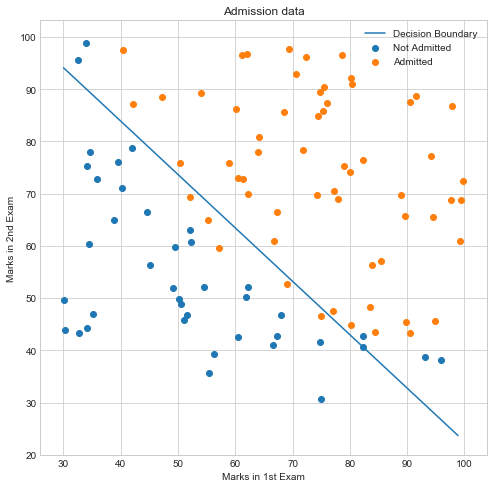

In [8]:
# Calculating decision boundary as describe above
x_values = [np.min(X[:, 1]), np.max(X[:, 2])]
y_values = - (optimized_params[0] + np.dot(optimized_params[1], x_values)) / optimized_params[2]

# Ploting results
fig = plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(cls_0[:, 0], cls_0[:, 1], label = "Not Admitted")
plt.scatter(cls_1[:, 0], cls_1[:, 1], label = "Admitted")
plt.title("Admission data")
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

## Lower Back Pain
Let's take all we have learned to determine whether a patient have lower back pain or not. The problem is to identify a person is abnormal or normal using collected physical spine details/data. 

Lower back pain can be caused by a variety of problems with any parts of the complex, interconnected network of spinal muscles, nerves, bones, discs or tendons in the lumbar spine. Typical sources of low back pain include:

- The large nerve roots in the low back that go to the legs may be irritated
- The smaller nerves that supply the low back may be irritated
- The large paired lower back muscles (erector spinae) may be strained
- The bones, ligaments or joints may be damaged
- An intervertebral disc may be degenerating

Let's load the data and have a peek at it.

**Note** : The data is taken from `Kaggle`, the source is mentioned in references.

In [9]:
# for data loading
import pandas as pd
# read data
df = pd.read_csv("Dataset_spine.csv")
df = df.iloc[:, :-1]
df = df.sample(frac=1).reset_index(drop=True)
# convert labels to numeric values
df.Class_att = df.Class_att.replace({"Abnormal" : 0, "Normal" : 1})

print("Dataset shape :", df.shape)
print("First 5 rows")
df.head()

Dataset shape : (310, 13)
First 5 rows


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.792425,21.345323,66.000000,42.447102,119.550391,12.382604,0.607879,21.5605,8.0233,8.72676,-8.842283,34.5721,1
1,57.035097,0.345728,49.198003,56.689369,103.048698,52.165145,0.561323,35.4921,14.1033,7.99506,-26.223143,40.1564,0
2,51.624672,15.969344,35.000000,35.655328,129.385308,1.009228,0.005045,32.4200,13.8149,11.28490,-25.770956,35.6191,1
3,68.613001,15.082235,63.014696,53.530766,123.431174,39.497987,0.249351,27.0646,17.7171,7.18220,-20.883262,17.1130,0
4,41.729963,12.254074,30.122586,29.475889,116.585706,-1.244402,0.468526,28.5598,12.4637,14.19610,-20.392538,33.0265,0


As we can observe, these are 310 Observations with 13 Attributes out of which 12 are Numeric Predictors and 1 is  Binary Class Attribute.

We will now split our dataset in two halves, training and testing

In [10]:
# split function
from sklearn.model_selection import train_test_split

# create train (90%) and test splits (10%)
train_data, test_data = train_test_split(df, test_size = 0.1)

# create variable for predictors
features = train_data.iloc[:, :-1]
X = np.ones((features.shape[0], features.shape[1] + 1))
X[:, 1:] = features.values

# create variable for ground truth
y = train_data.iloc[:, -1].values
y = y.reshape(-1, 1)

# initialize model weights
weights = np.random.rand(X.shape[1], 1)

As we have already defined our cost function adn gradient function we can directly optimize the model weights using `bfgs` metod as follows

In [11]:
opt_params = fmin_bfgs(cost_function, weights, gradient, args=(X, y.flatten()), disp=True)

print("Optimal parameters:\n", opt_params)

Optimization terminated successfully.
         Current function value: 0.280092
         Iterations: 48
         Function evaluations: 59
         Gradient evaluations: 59
Optimal parameters:
 [-1.48846984e+01  9.99803510e-02 -1.86849956e-01  2.41924882e-02
 -4.84189267e-03  1.04844825e-01 -1.75051977e-01  4.28544587e-01
 -1.15103571e-02  6.02502998e-02 -8.28438150e-02  2.02303985e-03
  7.84927484e-03]


<ipython-input-4-51e6712bf5f2>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


As their are 13 predictor variables, it is difficult to draw decision boundary for this example. But we have many metrics that shows us how well our model is performing.


Let's first generate prediction for our test test using our trained model.

In [12]:
# load test data in variables
test_features = test_data.iloc[:, :-1]
test_X = np.ones((test_features.shape[0], test_features.shape[1] + 1))

test_X[:, 1:] = test_features.values

test_y = test_data.iloc[:, -1].values
test_y = test_y.reshape(-1, 1)

# generate predictions probabilities
predictions = probability(opt_params, test_X)

# generate class prediction
predictions[np.where(predictions >= 0.5)] = 1
predictions[np.where(predictions < 0.5)] = 0

Now we have our predictions, we will calculate how accurate is our model, by comparing its predictions with the ground truth. the scikit-learn's accuracy score method will do this for us.

In [13]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy on test set {:.2f}%".format(accuracy_score(test_y, predictions) * 100))

Accuracy on test set 77.42%


As the dataset is very small, 77% accuracy is really good given low amount of data. you are welcome to play with different optimizers and parameters to try and improve the accuracy.

## References
- **Logistic regression** : https://en.wikipedia.org/wiki/Logistic_regression
- **Cross Entropy** : https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
- **Admission Dataset** : https://web.stanford.edu/class/archive/cs/cs109/cs109.1176/lectures/23-LogisticRegression.pdf
- **BFGS** : https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm
- **Lower back pain Dataset** : https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset